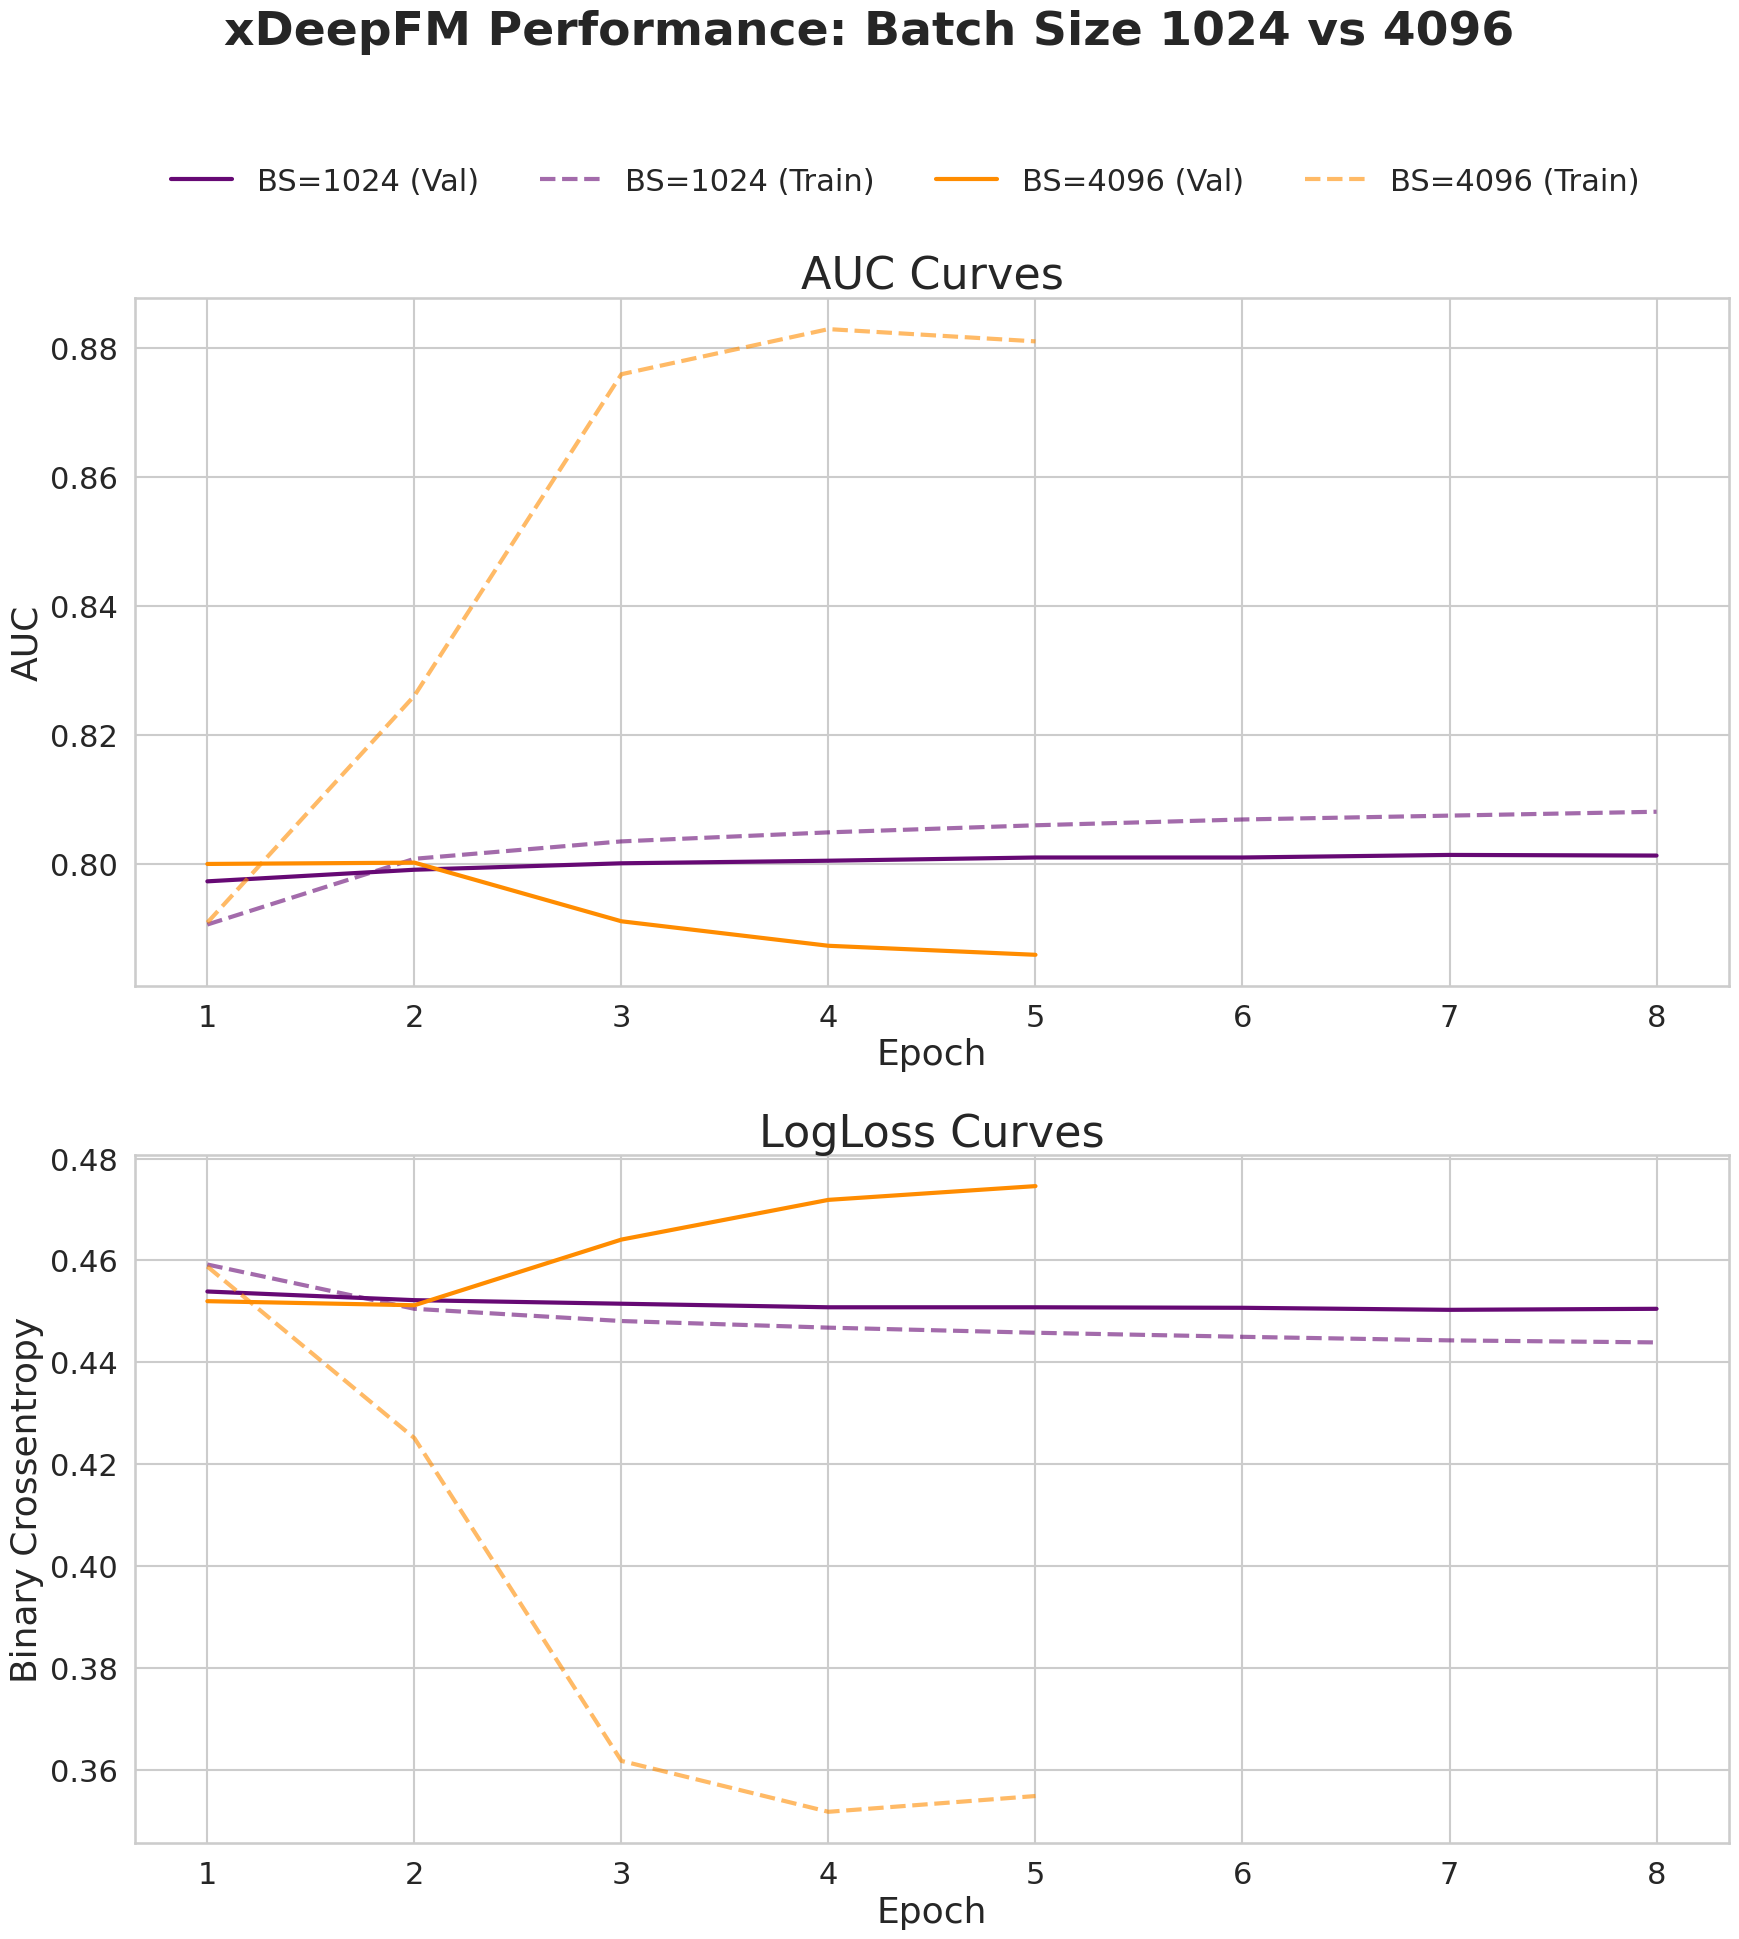

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 手动录入的训练日志数据（用于对比不同Batch Size的效果）
data_1024 = {
    'epochs': list(range(1, 9)),
    'train_auc': [0.7906, 0.8008, 0.8035, 0.8049, 0.8060, 0.8069, 0.8075, 0.8081],
    'val_auc':   [0.7973, 0.7991, 0.8001, 0.8005, 0.8010, 0.8010, 0.8014, 0.8013],
    'train_loss': [0.4592, 0.4505, 0.4481, 0.4468, 0.4458, 0.4450, 0.4443, 0.4439],
    'val_loss':   [0.4539, 0.4522, 0.4515, 0.4508, 0.4508, 0.4507, 0.4503, 0.4505]
}

data_4096 = {
    'epochs': list(range(1, 6)),
    'train_auc': [0.7909, 0.8261, 0.8760, 0.8830, 0.8811],
    'val_auc':   [0.8000, 0.8002, 0.7911, 0.7873, 0.7859],
    'train_loss': [0.4588, 0.4251, 0.3617, 0.3517, 0.3548],
    'val_loss':   [0.4520, 0.4512, 0.4641, 0.4719, 0.4746]
}

THEME_COLOR = '#660974'
COMP_COLOR = '#FF8C00'

sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.5)

plt.rcParams['axes.titlesize'] = 32
plt.rcParams['axes.labelsize'] = 26
plt.rcParams['xtick.labelsize'] = 22
plt.rcParams['ytick.labelsize'] = 22
plt.rcParams['legend.fontsize'] = 22
plt.rcParams['figure.titlesize'] = 34
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 12 

# 创建包含两个子图的画布
fig, axes = plt.subplots(2, 1, figsize=(18, 20))
fig.suptitle('xDeepFM Performance: Batch Size 1024 vs 4096', y=0.98, fontweight='bold')

# 子图1：绘制AUC曲线
ax = axes[0]

# 绘制验证集AUC（实线）和训练集AUC（虚线）
# BS 1024
ax.plot(data_1024['epochs'], data_1024['val_auc'], 
        color=THEME_COLOR, label='BS=1024 (Val)', linestyle='-') # 实线
ax.plot(data_1024['epochs'], data_1024['train_auc'], 
        color=THEME_COLOR, label='BS=1024 (Train)', linestyle='--', alpha=0.6) # 虚线

# BS 4096
ax.plot(data_4096['epochs'], data_4096['val_auc'], 
        color=COMP_COLOR, label='BS=4096 (Val)', linestyle='-') # 实线
ax.plot(data_4096['epochs'], data_4096['train_auc'], 
        color=COMP_COLOR, label='BS=4096 (Train)', linestyle='--', alpha=0.6) # 虚线

ax.set_title('AUC Curves')
ax.set_xlabel('Epoch')
ax.set_ylabel('AUC')

# 子图2：绘制LogLoss曲线
ax = axes[1]

# BS 1024
ax.plot(data_1024['epochs'], data_1024['val_loss'], 
        color=THEME_COLOR, linestyle='-')
ax.plot(data_1024['epochs'], data_1024['train_loss'], 
        color=THEME_COLOR, linestyle='--', alpha=0.6)

# BS 4096
ax.plot(data_4096['epochs'], data_4096['val_loss'], 
        color=COMP_COLOR, linestyle='-')
ax.plot(data_4096['epochs'], data_4096['train_loss'], 
        color=COMP_COLOR, linestyle='--', alpha=0.6)

ax.set_title('LogLoss Curves')
ax.set_xlabel('Epoch')
ax.set_ylabel('Binary Crossentropy')

lines, labels = axes[0].get_legend_handles_labels()

fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.52, 0.915), ncol=4, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.92])

plt.show()

In [ ]:
import pickle
import os
import pandas as pd

# 检查特征元数据的辅助函数
def check_sparse_features():
    base_dir = "data/processed_v4"
    metadata_path = os.path.join(base_dir, 'feature_metadata.pkl')

    print(f"Loading metadata from: {metadata_path}")
    with open(metadata_path, 'rb') as f:
        metadata = pickle.load(f)
    
    sparse_info = metadata.get('sparse', {})
    dense_info = metadata.get('dense', [])

    print("\n=== Sparse Features (Vocabulary Size) ===")
    print(f"{'Feature Name':<15} | {'Count (nunique)':<15}")
    print("-" * 35)
    
    total_sparse_dims = 0
    for feat, count in sparse_info.items():
        print(f"{feat:<15} | {count:<15}")
        total_sparse_dims += count
        
    print("-" * 35)
    print(f"Total Sparse Fields: {len(sparse_info)}")
    print(f"Total Embedding Rows needed: {total_sparse_dims}")
    
    print("\n=== Dense Features ===")
    print(f"Count: {len(dense_info)}")
    print(f"List: {dense_info}")

if __name__ == "__main__":
    check_sparse_features()

Loading metadata from: data/sparse_processed/feature_metadata.pkl

=== Sparse Features (Vocabulary Size) ===
Feature Name    | Count (nunique)
-----------------------------------
C1              | 1458           
C2              | 555            
C3              | 193949         
C4              | 138801         
C5              | 305            
C6              | 19             
C7              | 11970          
C8              | 633            
C9              | 3              
C10             | 42646          
C11             | 5178           
C12             | 192773         
C13             | 3175           
C14             | 27             
C15             | 11422          
C16             | 181075         
C17             | 10             
C18             | 4654           
C19             | 2032           
C20             | 4              
C21             | 189657         
C22             | 18             
C23             | 15             
C24             | 59697          
C25  